In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import math

In [2]:
def P_C(n, k, delta, eta):
    sum = 0
    for alpha in range(k, n+1):
        for beta in range(0, min(n-alpha+1,alpha)):
            f = math.factorial(n)/(math.factorial(alpha)*math.factorial(beta)*math.factorial(n-alpha-beta))
            e = ((1-eta)*(1-delta))**(alpha) * ((1-eta)*delta)**(beta) * (eta)**(n-alpha-beta)
            sum += f * e
    return sum
            
def P_I(n, k, delta, eta):
    sum = 0
    for beta in range(k, n+1):
        for alpha in range(0, min(n-beta+1,beta)):
            f = math.factorial(n)/(math.factorial(alpha)*math.factorial(beta)*math.factorial(n-alpha-beta))
            e = ((1-eta)*(1-delta))**(alpha) * ((1-eta)*delta)**(beta) * (eta)**(n-alpha-beta)
            sum += f * e
    return sum

def P_NC(n, k, delta, eta):
    return 1 - P_C(n, k, delta, eta) - P_I(n, k, delta, eta)

In [3]:
def accuracy(n, k, delta, eta):
    return P_C(n, k, delta, eta)

def confidence(n, k, delta, eta):
    pc = P_C(n, k, delta, eta)
    return pc / (pc + P_I(n, k, delta, eta))

def yield_rate(n, k, delta, eta):
    return P_C(n, k, delta, eta) + P_I(n, k, delta, eta)

In [4]:
P_C(100, 15, 0.4, 0.5)

0.9124017419838358

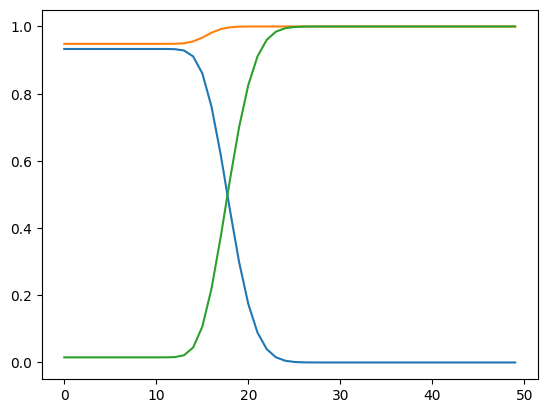

In [5]:
plt.plot([P_C(100, int(k), 0.4, 0.4) for k in np.linspace(1,100)])
plt.plot([1-P_I(100, int(k), 0.4, 0.4) for k in np.linspace(1,100)])
plt.plot([P_NC(100, int(k), 0.4, 0.4) for k in np.linspace(1,100)])

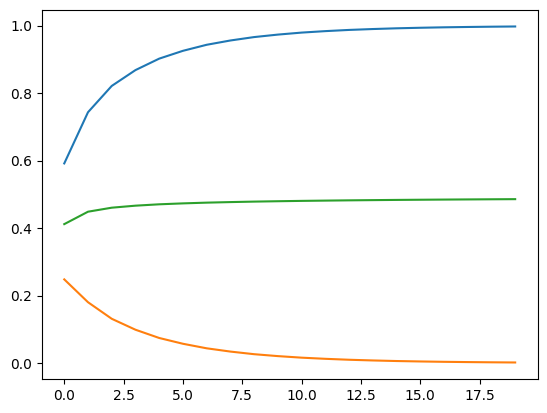

In [6]:
plt.plot([P_C(int(n), 1, 0.4, 0.5) for n in np.linspace(10,400,20)])
plt.plot([P_C(int(n), 1, 0.6, 0.5) for n in np.linspace(10,400,20)])
plt.plot([P_C(int(n), 1, 0.5, 0.5) for n in np.linspace(10,400,20)])

128it [00:11, 11.30it/s]
128it [00:11, 10.96it/s]
128it [00:23,  5.53it/s]


<a list of 9 text.Text objects>

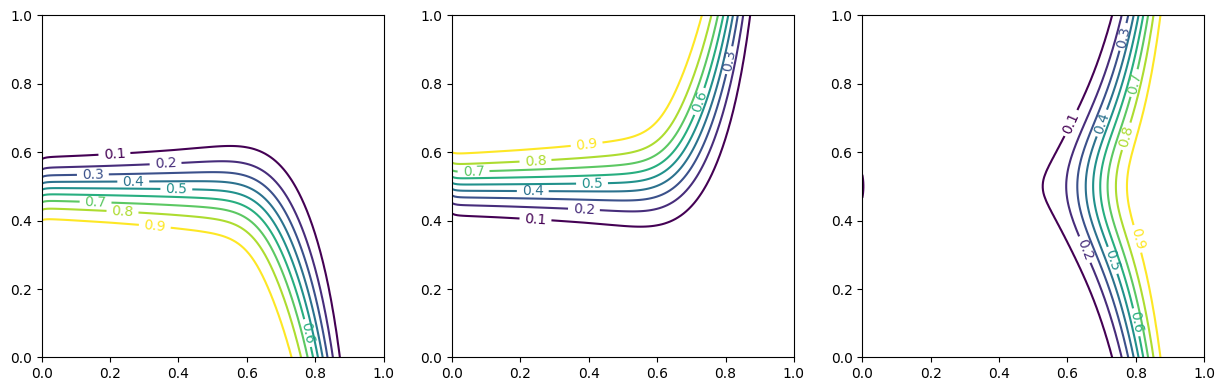

In [7]:
n = 50
k = 10
resolution = 128

fig, ax = plt.subplots(1, 3, figsize=(15,5))
for a in ax:
    a.set_aspect('equal', adjustable='box')

pc_array = np.zeros((resolution,resolution))
for i,delta in tqdm.tqdm(enumerate(np.linspace(0,1,resolution))):
    for j,eta in enumerate(np.linspace(0,1,resolution)):
        pc_array[i,j] = P_C(n, k, delta, eta)
        
pi_array = np.zeros((resolution,resolution))
for i,delta in tqdm.tqdm(enumerate(np.linspace(0,1,resolution))):
    for j,eta in enumerate(np.linspace(0,1,resolution)):
        pi_array[i,j] = P_I(n, k, delta, eta)
        
pnc_array = np.zeros((resolution,resolution))
for i,delta in tqdm.tqdm(enumerate(np.linspace(0,1,resolution))):
    for j,eta in enumerate(np.linspace(0,1,resolution)):
        pnc_array[i,j] = P_NC(n, k, delta, eta)

    
# ax[0].pcolormesh(pc_array, cmap='hot')
# ax[1].pcolormesh(pi_array, cmap='hot')
# ax[2].pcolormesh(pnc_array, cmap='hot')

CS = ax[0].contour(np.linspace(0,1,resolution), np.linspace(0,1,resolution), pc_array, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax[0].clabel(CS, fontsize=10)
CS = ax[1].contour(np.linspace(0,1,resolution), np.linspace(0,1,resolution), pi_array, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax[1].clabel(CS, fontsize=10)
CS = ax[2].contour(np.linspace(0,1,resolution), np.linspace(0,1,resolution), pnc_array, levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax[2].clabel(CS, fontsize=10)

In [47]:
def P_C(n, k, delta, eta):
    sum = 0
    for alpha in range(k, n+1):
        for beta in range(0, min(n-alpha+1,alpha)):
            f = math.factorial(n)/(math.factorial(alpha)*math.factorial(beta)*math.factorial(n-alpha-beta))
            e = ((1-eta)*(1-delta))**(alpha) * ((1-eta)*delta)**(beta) * (eta)**(n-alpha-beta)
            sum += f * e
    sum2 = 0
    for beta in range(k, n // 2 + 1):
        f = math.factorial(n)/(math.factorial(beta)*math.factorial(beta)*math.factorial(n-beta-beta))
        e = ((1-eta)*(1-delta))**(beta) * ((1-eta)*delta)**(beta) * (eta)**(n-beta-beta)
        sum2 += f * e
    return sum + sum2 * (1-delta)
            
def P_I(n, k, delta, eta):
    sum = 0
    for beta in range(k, n+1):
        for alpha in range(0, min(n-beta+1,beta)):
            f = math.factorial(n)/(math.factorial(alpha)*math.factorial(beta)*math.factorial(n-alpha-beta))
            e = ((1-eta)*(1-delta))**(alpha) * ((1-eta)*delta)**(beta) * (eta)**(n-alpha-beta)
            sum += f * e
    sum2 = 0
    for beta in range(k, n // 2 + 1):
        f = math.factorial(n)/(math.factorial(beta)*math.factorial(beta)*math.factorial(n-beta-beta))
        e = ((1-eta)*(1-delta))**(beta) * ((1-eta)*delta)**(beta) * (eta)**(n-beta-beta)
        sum2 += f * e
    return sum + sum2 * (delta)

def P_NC(n, k, delta, eta):
    return 1 - P_C(n, k, delta, eta) - P_I(n, k, delta, eta)

In [61]:
def P_NC_tie(n, k, delta, eta):
    sum = 0
    for beta in range(k, n // 2 + 1):
        f = math.factorial(n)/(math.factorial(beta)*math.factorial(beta)*math.factorial(n-beta-beta))
        e = ((1-eta)*(1-delta))**(beta) * ((1-eta)*delta)**(beta) * (eta)**(n-beta-beta)
        sum += f * e
    return sum

def P_NC_summand(n, k, delta, eta, beta):
    f = math.factorial(n)/(math.factorial(beta)*math.factorial(beta)*math.factorial(n-beta-beta))
    e = ((1-eta)*(1-delta))**(beta) * ((1-eta)*delta)**(beta) * (eta)**(n-beta-beta)
    return f * e

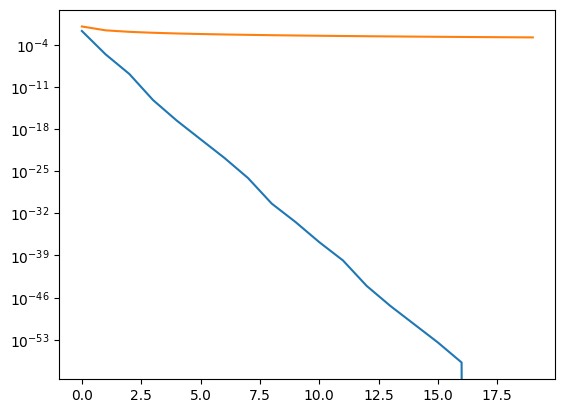

In [80]:
plt.plot([P_NC_summand(int(n), 1, 0.5, 0.666, int(n//3)) for n in np.linspace(10,650,20)])
plt.plot([1/n for n in np.linspace(10,650,20)])
plt.gca().set_yscale('log')

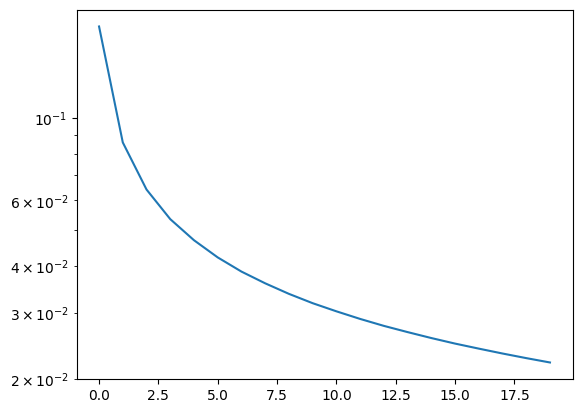

In [78]:
plt.plot([P_NC_tie(int(n), 1, 0.5, 0.5) for n in np.linspace(10,650,20)])
plt.gca().set_yscale('log')

In [48]:
P_I(100, 1, 0.5, 0.5) + P_C(100, 1, 0.5, 0.5)

0.9999999999999996

In [49]:
P_I(200, 1, 0.5, 0.5) + P_C(200, 1, 0.5, 0.5)

0.999999999999997

In [50]:
P_I(400, 1, 0.5, 0.5) + P_C(400, 1, 0.5, 0.5)

0.999999999999996

In [9]:
x,y = np.linspace(1,500,100), [P_NC(int(n), 1, 0.5, 0.5) for n in np.linspace(1,500,100)]

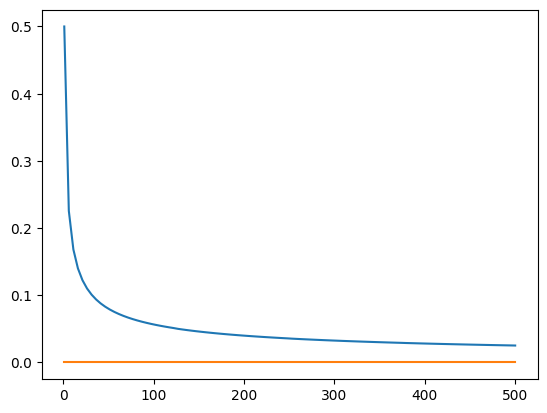

In [44]:
plt.plot(x,y)
plt.plot(x, [0 for n in np.linspace(1,500,100)])
# plt.gca().set_yscale('log')

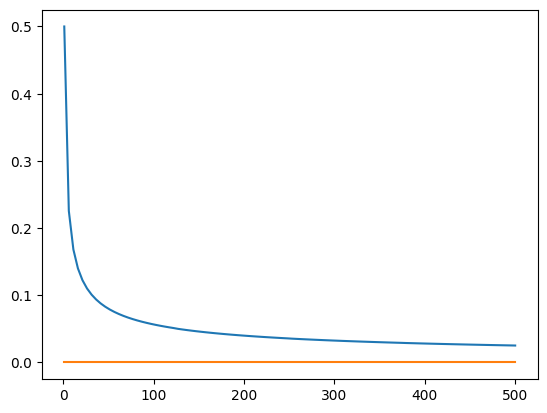

In [10]:
plt.plot(x,y)
plt.plot(x, [0 for n in np.linspace(1,500,100)])
# plt.gca().set_yscale('log')

In [ ]:
def P_C(n, k, delta, eta):
    sum = 0
    for alpha in range(k, n+1):
        for beta in range(0, min(n-alpha+1,alpha)):
            f = math.factorial(n)/(math.factorial(alpha)*math.factorial(beta)*math.factorial(n-alpha-beta))
            e = ((1-eta)*(1-delta))**(alpha) * ((1-eta)*delta)**(beta) * (eta)**(n-alpha-beta)
            sum += f * e
    return sum